# Trabajo Práctico - Análisis Exploratorio

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")

# Dataset elegido

Predicting a Pulsar Star.

Pulsar candidates collected during the High Time Resolution Universe Survey --> https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star

# Lectura de datos

In [2]:
data = pd.read_csv('../datasets/pulsar-stars/pulsar_stars.csv')

# Consideraciones

"Perfil integrado": 
La superposición de algunos centenares de pulsos registrados, da el perfil integrado del pulso, el cual es normalmente estable y característico para cada púlsar.
El perfil integrado está constituido por una gran variedad de pulsos individuales, cada uno de los cuales tiene más de una componente: es la distribución estadística de estas componentes sobre un rango de longitudes, combinado con sus característicos anchos de banda y la distribución de probabilidad de sus intensidades lo que determina la forma repetitiva del perfil integrado.

Cada candidato consta de una selección de parámetros, que incluyen la medida de dispersión (DM) del púlsar, así como la relación señal-ruido (SNR) detectada en varios métodos de búsqueda.

#### Renombrado de columnas:

Decidimos renombrar las colunmas pasándolas a español para hacerlas más "entendibles" a simple vista.

In [3]:
data.columns = [col.strip() for col in data.columns]

In [4]:
NOMBRES_COLUMNAS = {
    'Mean of the integrated profile' : 'media del perfil integrado',
    'Standard deviation of the integrated profile' : 'desviacion estandar del perfil integrado',
    'Excess kurtosis of the integrated profile' : 'exceso de curtosis del perfil integrado',
    'Skewness of the integrated profile' : 'sesgo del perfil integrado',
    'Mean of the DM-SNR curve' : 'media de la curva DM-SNR',
    'Standard deviation of the DM-SNR curve' : 'desviacion estandar de la curva DM-SNR',
    'Excess kurtosis of the DM-SNR curve' : 'exceso de curtosis de la curva DM-SNR',
    'Skewness of the DM-SNR curve' : 'sesgo de la curva DM-SNR',
    'target_class' : 'target_class'
}
data.rename(columns=NOMBRES_COLUMNAS, inplace=True)

# Análisis preliminar

#### Dimensión del dataset:

El dataset cuenta con 17898 filas y 9 columnas.

In [5]:
data.shape

(17898, 9)

#### Tipos de datos de las columnas:

In [6]:
data.dtypes

media del perfil integrado                  float64
desviacion estandar del perfil integrado    float64
exceso de curtosis del perfil integrado     float64
sesgo del perfil integrado                  float64
media de la curva DM-SNR                    float64
desviacion estandar de la curva DM-SNR      float64
exceso de curtosis de la curva DM-SNR       float64
sesgo de la curva DM-SNR                    float64
target_class                                  int64
dtype: object

#### Cantidad de valores nulos por columna:

In [7]:
data.isnull().sum()

media del perfil integrado                  0
desviacion estandar del perfil integrado    0
exceso de curtosis del perfil integrado     0
sesgo del perfil integrado                  0
media de la curva DM-SNR                    0
desviacion estandar de la curva DM-SNR      0
exceso de curtosis de la curva DM-SNR       0
sesgo de la curva DM-SNR                    0
target_class                                0
dtype: int64

#### Visualización de datos

In [8]:
data.head(20)

,media del perfil integrado,desviacion estandar del perfil integrado,exceso de curtosis del perfil integrado,sesgo del perfil integrado,media de la curva DM-SNR,desviacion estandar de la curva DM-SNR,exceso de curtosis de la curva DM-SNR,sesgo de la curva DM-SNR,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [9]:
data.describe()

,media del perfil integrado,desviacion estandar del perfil integrado,exceso de curtosis del perfil integrado,sesgo del perfil integrado,media de la curva DM-SNR,desviacion estandar de la curva DM-SNR,exceso de curtosis de la curva DM-SNR,sesgo de la curva DM-SNR,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


#### Visualizacion de datos donde target_class es igual a 1

In [10]:
data1 = data[data['target_class']==1]

In [11]:
data1.head(20)

,media del perfil integrado,desviacion estandar del perfil integrado,exceso de curtosis del perfil integrado,sesgo del perfil integrado,media de la curva DM-SNR,desviacion estandar de la curva DM-SNR,exceso de curtosis de la curva DM-SNR,sesgo de la curva DM-SNR,target_class
19,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1
42,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,1
61,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1
92,23.625000,29.948654,5.688038,35.987172,146.568562,82.394624,-0.274902,-1.121848,1
93,94.585938,35.779823,1.187309,3.687469,6.071070,29.760400,5.318767,28.698048,1
100,123.468750,45.475085,0.345781,0.647415,32.919732,65.094197,1.605538,0.871364,1
110,35.156250,30.237714,4.203475,24.486691,34.101171,62.577395,1.890020,2.572133,1
132,18.117188,29.297670,6.446706,44.601588,50.107860,66.321825,1.456423,1.335182,1
145,44.867188,45.693334,2.888739,8.810673,176.119565,59.737720,-1.785377,2.940913,1
146,26.921875,34.511006,4.709838,24.247400,183.622910,79.932815,-1.326647,0.346712,1


# Análisis exploratorio

### Definición de variables:

    * media del perfil integrado: Media del perfil integrado -> Entrada
    * desviacion estandar del perfil integrado: Desviacion estándar del perfil integrado -> Entrada
    * exceso de curtosis del perfil integrado: Exceso de curtosis del perfil integrado -> Entrada
    * sesgo del perfil integrado: Sesgo del perfil integrado -> Entrada
    * media de la curva DM-SNR: Media de la curva DM-SNR -> Entrada
    * desviacion estandar de la curva DM-SNR: Desviacion estandar de la curva DM-SNR ->Entrada
    * exceso de curtosis de la curva DM-SNR: Exceso de curtosis de la curva DM-SNR -> Entrada
    * sesgo de la curva DM-SNR: Sesgo de la curva DM-SNR -> Entrada
    * target_class: -> Salida: 0 representa que NO es Estrella Púlsar; 1 representa que SI es Estrella Púlsar
    
Decidimos utilizar todas las variables, y sin ningún tipo de transformación.

### Balanceo de la variable de salida

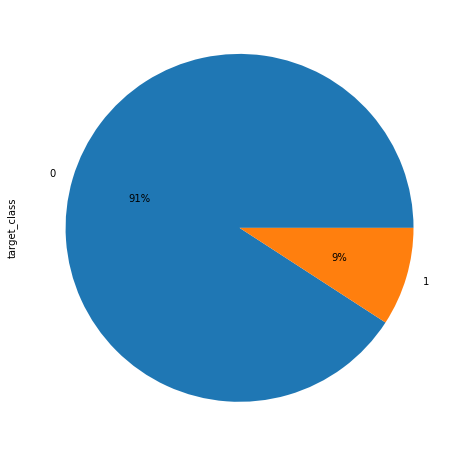

In [12]:
data.target_class.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8,8))

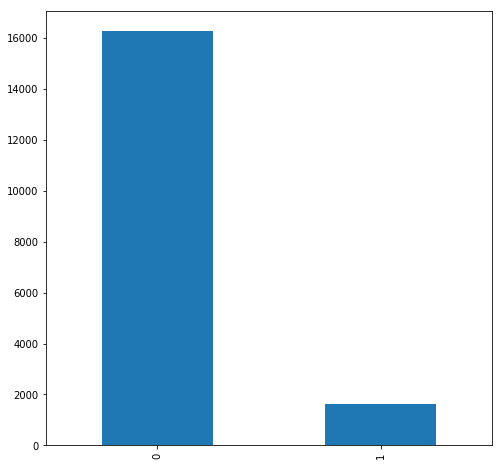

In [13]:
data.target_class.value_counts().plot.bar(figsize=(8,8))

Se puede apreciar a simple vista que la variable de salida no está balanceada.

# Análisis detallado de variables

### Relación entre las variables

#### Cada variable se compara con todas las demás

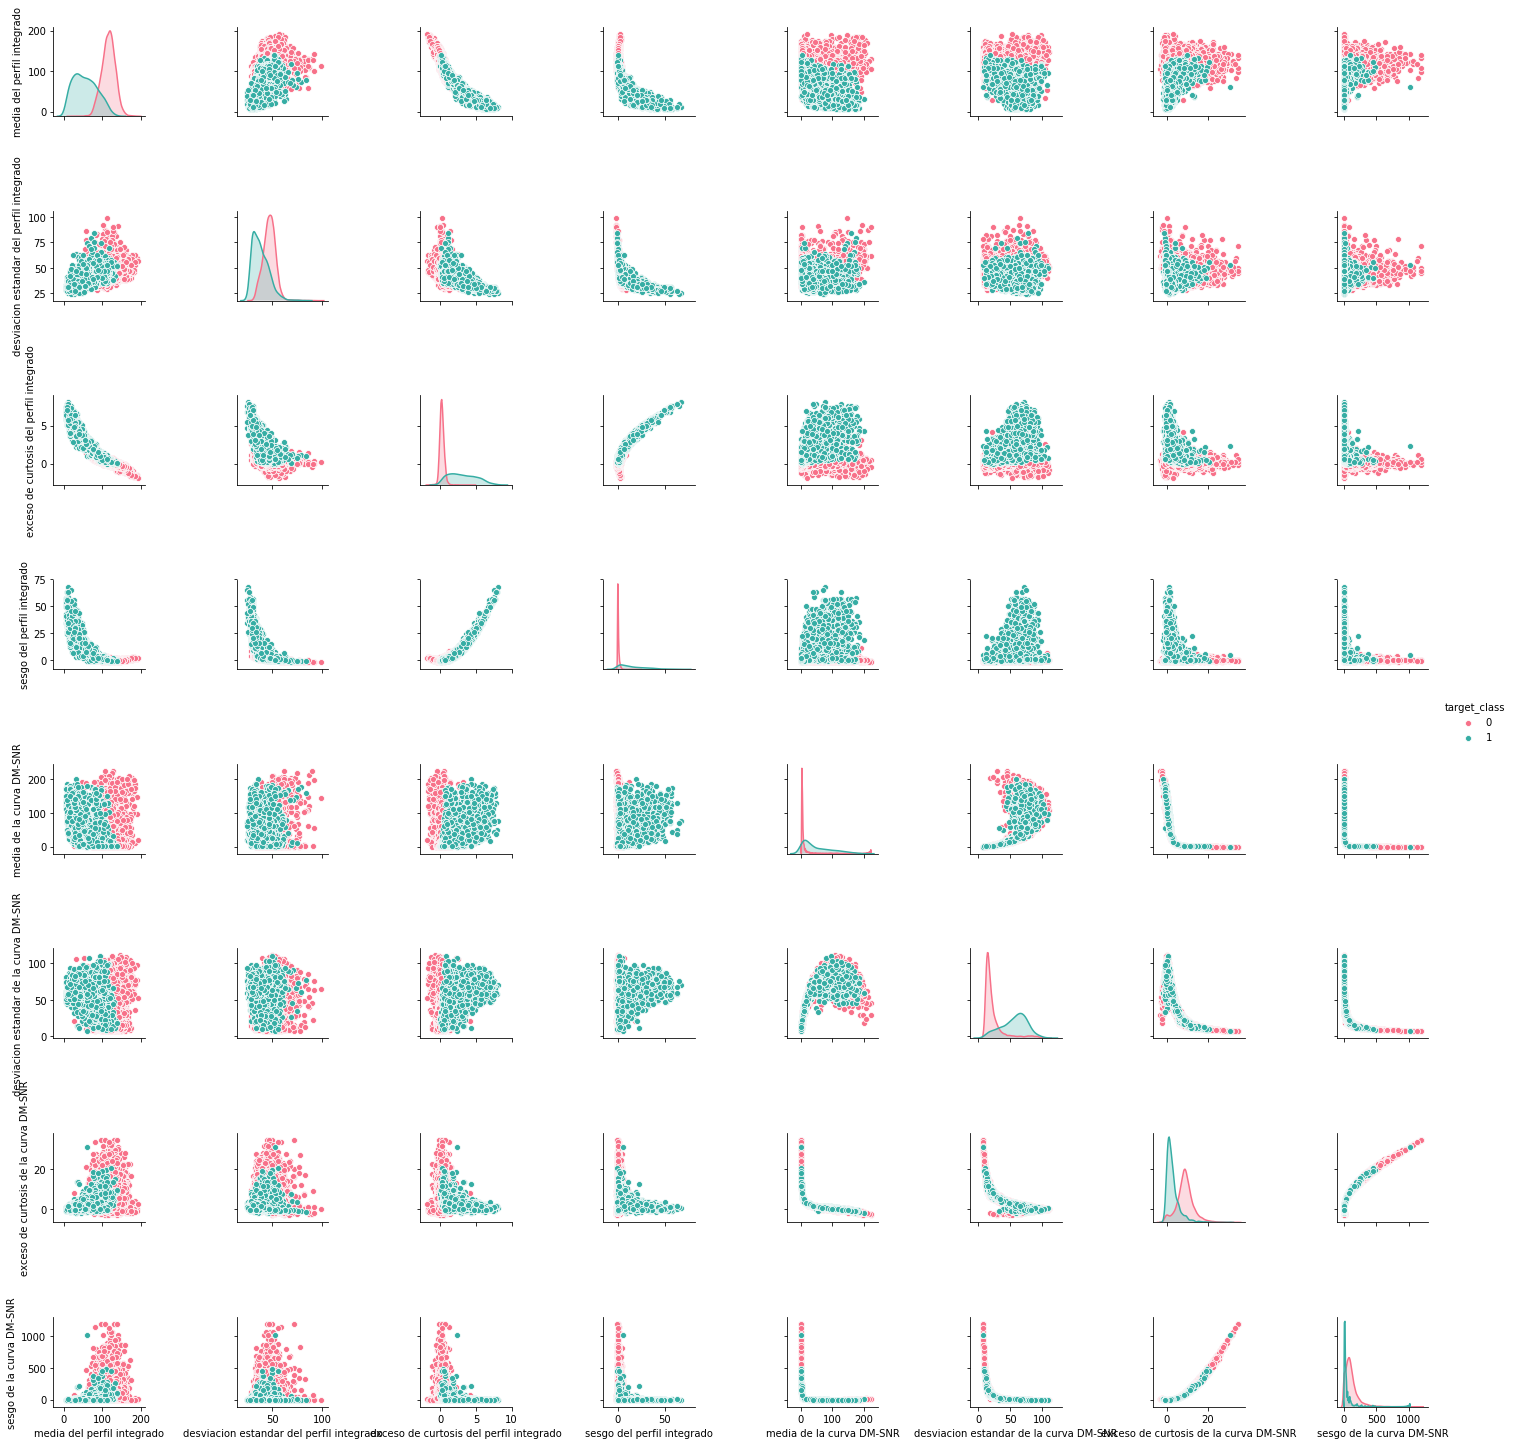

In [14]:
sns.pairplot(data=data,
             palette="husl",
             hue="target_class",
             vars=[
                "media del perfil integrado",
                "desviacion estandar del perfil integrado",
                "exceso de curtosis del perfil integrado",
                "sesgo del perfil integrado",
                "media de la curva DM-SNR",
                "desviacion estandar de la curva DM-SNR",
                "exceso de curtosis de la curva DM-SNR",
                "sesgo de la curva DM-SNR"])

#### Correlación entre las variables

Text(0.5, 1.0, 'CORRELACION ENTRE VARIABLES')

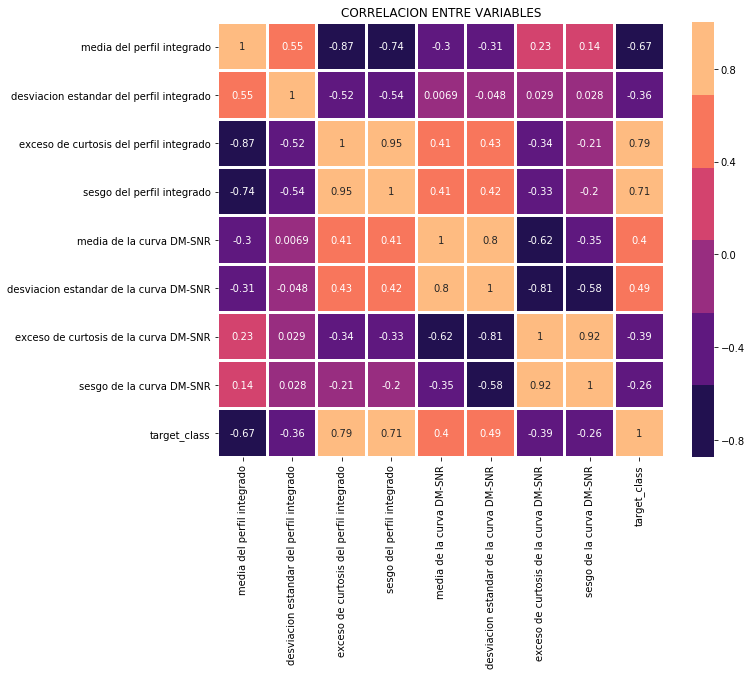

In [15]:
correlation = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("magma"),
            linewidth=2,edgecolor="k")
plt.title("CORRELACION ENTRE VARIABLES")

#### Distribución de las variables

(array([ 155.,  201.,  240.,  209.,  213.,  308.,  919., 1854., 3326.,
        4353., 3656., 1847.,  476.,   97.,   32.,   12.]),
 array([  5.8125    ,  17.48779297,  29.16308594,  40.83837891,
         52.51367188,  64.18896484,  75.86425781,  87.53955078,
         99.21484375, 110.89013672, 122.56542969, 134.24072266,
        145.91601562, 157.59130859, 169.26660156, 180.94189453,
        192.6171875 ]),
 <a list of 16 Patch objects>)

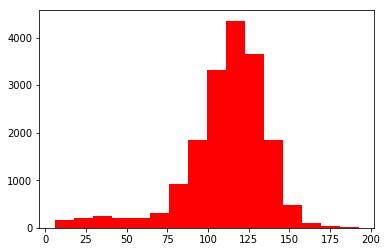

In [64]:
k = int(np.ceil(1 + np.log2(17898))) #Regla de sturges
colors = ['red', 'blue', 'green', 'black', 'yellow', 'cyan', 'magenta', 'orange']
plt.hist(data['media del perfil integrado'], bins=k, color=colors[0])


(array([1.280e+02, 6.010e+02, 1.587e+03, 2.864e+03, 4.838e+03, 4.835e+03,
        2.339e+03, 5.150e+02, 8.300e+01, 4.600e+01, 2.900e+01, 1.400e+01,
        8.000e+00, 6.000e+00, 4.000e+00, 1.000e+00]),
 array([24.77204176, 29.39747107, 34.02290037, 38.64832968, 43.27375899,
        47.89918829, 52.5246176 , 57.15004691, 61.77547622, 66.40090552,
        71.02633483, 75.65176414, 80.27719344, 84.90262275, 89.52805206,
        94.15348136, 98.77891067]),
 <a list of 16 Patch objects>)

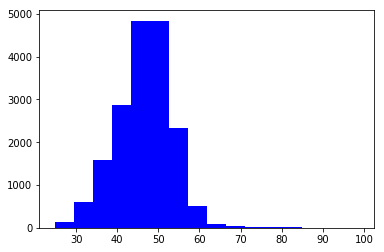

In [38]:
plt.hist(data['desviacion estandar del perfil integrado'], bins=k, color=colors[1])

(array([   27.,    89.,  3548., 11179.,  1634.,   251.,   210.,   176.,
          160.,   146.,   152.,   125.,   113.,    46.,    29.,    13.]),
 array([-1.87601118, -1.25441535, -0.63281953, -0.0112237 ,  0.61037213,
         1.23196795,  1.85356378,  2.47515961,  3.09675543,  3.71835126,
         4.33994709,  4.96154291,  5.58313874,  6.20473457,  6.82633039,
         7.44792622,  8.06952205]),
 <a list of 16 Patch objects>)

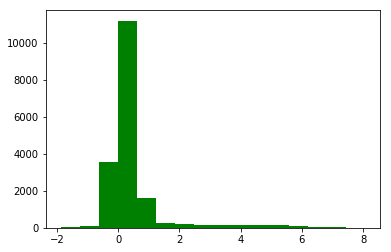

In [39]:
plt.hist(data['exceso de curtosis del perfil integrado'], bins=k, color=colors[2])

(array([1.5979e+04, 8.5800e+02, 2.2700e+02, 1.7200e+02, 1.2900e+02,
        1.0700e+02, 1.0900e+02, 9.7000e+01, 7.9000e+01, 5.7000e+01,
        2.9000e+01, 2.0000e+01, 1.8000e+01, 1.2000e+01, 3.0000e+00,
        2.0000e+00]),
 array([-1.79188598,  2.57645825,  6.94480248, 11.31314671, 15.68149095,
        20.04983518, 24.41817941, 28.78652364, 33.15486787, 37.52321211,
        41.89155634, 46.25990057, 50.6282448 , 54.99658903, 59.36493327,
        63.7332775 , 68.10162173]),
 <a list of 16 Patch objects>)

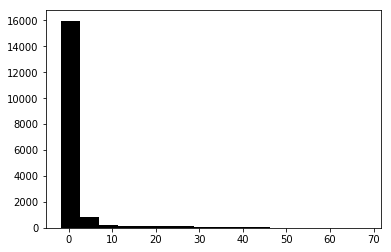

In [40]:
plt.hist(data['sesgo del perfil integrado'], bins=k, color=colors[3])

(array([1.5332e+04, 7.0800e+02, 3.5200e+02, 2.1600e+02, 2.2500e+02,
        1.7800e+02, 1.8700e+02, 1.7000e+02, 1.5900e+02, 1.0700e+02,
        7.6000e+01, 7.2000e+01, 5.5000e+01, 3.8000e+01, 1.9000e+01,
        4.0000e+00]),
 array([2.13210702e-01, 1.41618938e+01, 2.81105769e+01, 4.20592600e+01,
        5.60079432e+01, 6.99566263e+01, 8.39053094e+01, 9.78539925e+01,
        1.11802676e+02, 1.25751359e+02, 1.39700042e+02, 1.53648725e+02,
        1.67597408e+02, 1.81546091e+02, 1.95494774e+02, 2.09443457e+02,
        2.23392140e+02]),
 <a list of 16 Patch objects>)

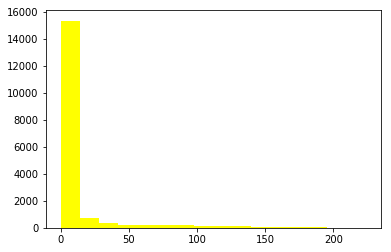

In [41]:
plt.hist(data['media de la curva DM-SNR'], bins=k, color=colors[4])

(array([3678., 6624., 2703., 1252.,  663.,  429.,  385.,  368.,  381.,
         383.,  345.,  285.,  207.,  133.,   44.,   18.]),
 array([  7.37043217,  13.82491832,  20.27940447,  26.73389062,
         33.18837677,  39.64286293,  46.09734908,  52.55183523,
         59.00632138,  65.46080753,  71.91529369,  78.36977984,
         84.82426599,  91.27875214,  97.7332383 , 104.18772445,
        110.6422106 ]),
 <a list of 16 Patch objects>)

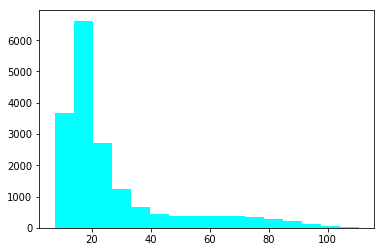

In [42]:
plt.hist(data['desviacion estandar de la curva DM-SNR'], bins=k, color=colors[5])

(array([ 216., 1329., 1383., 2142., 4343., 4464., 2161.,  954.,  460.,
         220.,  110.,   57.,   30.,   14.,    8.,    7.]),
 array([-3.13926961, -0.784325  ,  1.57061961,  3.92556423,  6.28050884,
         8.63545345, 10.99039806, 13.34534268, 15.70028729, 18.0552319 ,
        20.41017651, 22.76512113, 25.12006574, 27.47501035, 29.82995496,
        32.18489958, 34.53984419]),
 <a list of 16 Patch objects>)

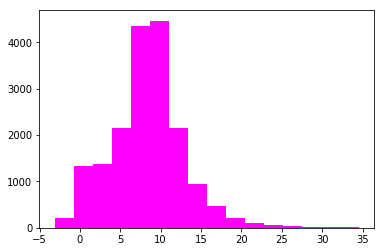

In [43]:
plt.hist(data['exceso de curtosis de la curva DM-SNR'], bins=k, color=colors[6])

(array([7.896e+03, 5.976e+03, 2.253e+03, 8.770e+02, 4.090e+02, 2.000e+02,
        1.120e+02, 6.700e+01, 3.500e+01, 2.500e+01, 1.600e+01, 1.300e+01,
        5.000e+00, 5.000e+00, 3.000e+00, 6.000e+00]),
 array([  -1.9769756 ,   72.58413768,  147.14525097,  221.70636426,
         296.26747755,  370.82859084,  445.38970412,  519.95081741,
         594.5119307 ,  669.07304399,  743.63415727,  818.19527056,
         892.75638385,  967.31749714, 1041.87861042, 1116.43972371,
        1191.000837  ]),
 <a list of 16 Patch objects>)

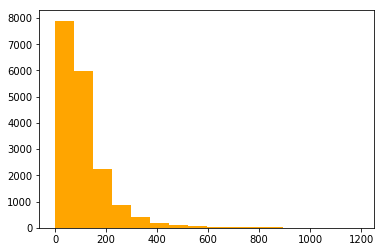

In [44]:
plt.hist(data['sesgo de la curva DM-SNR'], bins=k, color=colors[7])

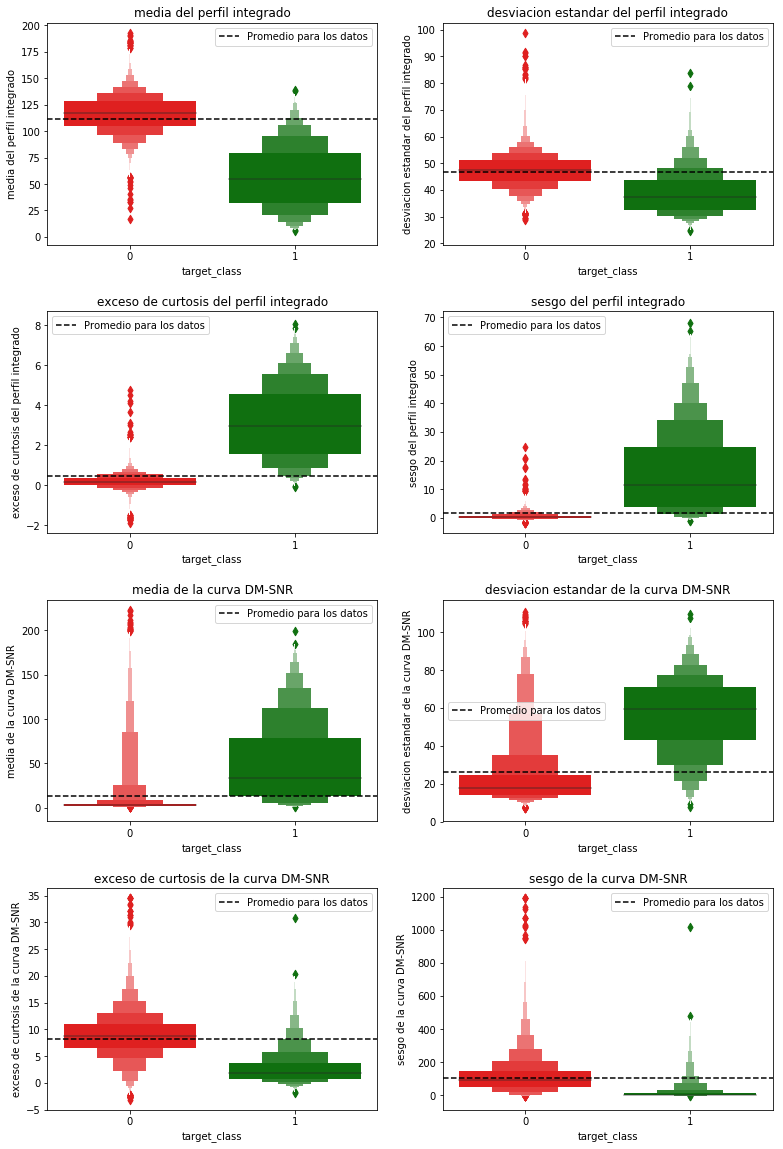

In [35]:
columns = [x for x in data.columns if x not in ["target_class"]]
length  = len(columns)
plt.figure(figsize=(13,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(4,2,j+1)
    sns.lvplot(x=data["target_class"],y=data[i],palette=["red","green"])
    plt.title(i)
    plt.subplots_adjust(hspace=.3)
    plt.axhline(data[i].mean(),linestyle = "dashed",color ="k",label ="Promedio para los datos")
    plt.legend(loc="best")

ValueError: color kwarg must have one color per data set. 9 data sets and 1 colors were provided

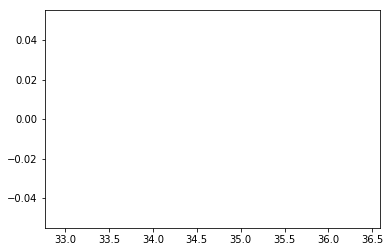

In [66]:
colors  = ["r","g","b","m","y","c","k","orange"]
sns.distplot(data, bins=k)